In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
def plot_trace(stage: str, iterations = 500, cycle = 50):
    #combine json into a dataframe
    with open(stage + '_json/' + stage +'_train_reward_1.json') as f:
        data1 = json.load(f)
        data1 = pd.DataFrame(data1)
        data1.columns = [ 'reward1']
    with open(stage + '_json/' + stage +'_train_reward_2.json') as f:
        data2 = json.load(f)
        data2 = pd.DataFrame(data2)
        data2.columns = [ 'reward2']
    with open(stage + '_json/' + stage +'_train_reward_3.json') as f:
        data3 = json.load(f)
        data3 = pd.DataFrame(data3)
        data3.columns = ['reward3']
    data = pd.concat([data1, data2, data3],axis=1)
    train_data = data.reset_index()
    train_data.columns = ['episode', 'reward1', 'reward2', 'reward3']

    with open(stage + '_json/' + stage +'_eval_reward_1.json') as f:
        data1 = json.load(f)
        data1 = pd.DataFrame(data1)
        data1.columns = [ 'reward1']
    with open(stage + '_json/' + stage +'_eval_reward_2.json') as f:
        data2 = json.load(f)
        data2 = pd.DataFrame(data2)
        data2.columns = [ 'reward2']
    with open(stage + '_json/' + stage +'_eval_reward_3.json') as f:
        data3 = json.load(f)
        data3 = pd.DataFrame(data3)
        data3.columns = ['reward3']
    data = pd.concat([data1, data2, data3],axis=1)
    test_data = data.apply(lambda x: x.mean(), axis=1)

    test_data = test_data.reset_index()

    test_data.columns = ['episode', 'reward']
    test_data['episode'] = (test_data['episode'] + 1)*50


    # plot the scatter plot of Q3a_train_reward.json

    plt.figure(figsize=(6, 4),dpi = 100)
    sns.scatterplot(data=train_data[['reward1','reward2','reward3']],  alpha=0.3, s = 10)
    sns.lineplot(x='episode', y='reward', data=test_data, color='blue', markers=True, dashes=False,label = 'eval reward')
    # mark the maximum value of the lineplot
    plt.plot(test_data['episode'][test_data['reward'].idxmax()], test_data['reward'].max(), 'bx')
    # lable the maximum value with red color of the lineplot using red color
    plt.text(test_data['episode'][test_data['reward'].idxmax()]-144, test_data['reward'].max()+15, 'Max reward = {}'.format(round(test_data['reward'].max(), 1)), color='blue')


    plt.xlabel('episode')
    plt.ylabel('reward')
    plt.xlim(0, 500)
    plt.ylim(-300, 100)
    plt.legend(loc='lower right')
    # plot a base line for y = 0
    plt.plot([0, 500], [0, 0], 'k--')

    plt.title(stage + ' train & eval reward trace with decreasing epsilon')
    plt.show()

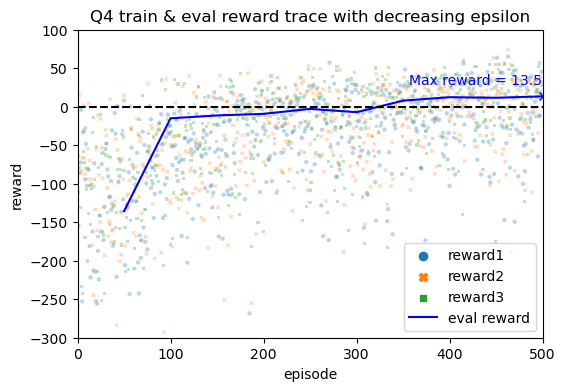

In [3]:
plot_trace('Q4')

In [ ]:
plot_trace('Q4b')